# Importation de libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans #importation de Kmeans
from sklearn.model_selection import train_test_split 
from collections import Counter
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
dataF = pd.read_csv("Data6.txt",sep="\t")

# Attribute selection

In [3]:
dataF.isna().sum()

Time                                                                                                                     3
Time Code                                                                                                                5
Country Name                                                                                                             5
Country Code                                                                                                             5
Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]                                                                   16
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                                                               22
GDP (current US$) [NY.GDP.MKTP.CD]                                                                                      18
Individuals using the Internet (% of population) [IT.NET.USER.ZS]                                                       20
Maternal mortali

In [4]:
dataF = dataF.drop(['Time', 'Time Code', 'Country Code','Armed forces personnel (% of total labor force) [MS.MIL.TOTL.TF.ZS]', 'Labor force participation rate for ages 15-24, female (%) (national estimate) [SL.TLF.ACTI.1524.FE.NE.ZS]','Population ages 0-14, total [SP.POP.0014.TO]'], axis = 1)

dataF.rename(columns = {'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]': 'Birth rate',
                     'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]': 'Fertility rate',
                     'GDP (current US$) [NY.GDP.MKTP.CD]': 'GDP',
                     'Individuals using the Internet (% of population) [IT.NET.USER.ZS]': 'Individuals using the internet',
                     'Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]': 'Maternal mortality ratio',
                     'Refugee population by country or territory of origin [SM.POP.REFG.OR]': 'Refugee population',
                     'Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]': 'Unemployed female',
                     'Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]': 'Unemployed male',
                     'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]': 'Unemployed total',
                      'CO2 emissions (kt) [EN.ATM.CO2E.KT]': 'CO2 emissions',
                      'Forest area (% of land area) [AG.LND.FRST.ZS]': 'Forest area',
                      'Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE]': 'Methane emissions',
                      'Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE]': 'Nitrous oxide emissions',
                      'Number of deaths ages 5-14 years [SH.DTH.0514]': 'Number of death ages 5-14 years',
                      'Number of infant deaths [SH.DTH.IMRT]': 'Number of infant death',
                      'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) [EN.ATM.PM25.MC.ZS]': 'PM2.5 air pollution',
                      'Population growth (annual %) [SP.POP.GROW]': 'Population growth',
                      'Population density (people per sq. km of land area) [EN.POP.DNST]': 'Population density',
                      'Population ages 0-14 (% of total population) [SP.POP.0014.TO.ZS]': 'Population ages 0-14',
                      'Population ages 0-14, female (% of female population) [SP.POP.0014.FE.ZS]': 'Population ages 0-14, female',
                      'Population ages 0-14, male (% of male population) [SP.POP.0014.MA.ZS]': 'Population ages 0-14, male',
                      'Suicide mortality rate, male (per 100,000 male population) [SH.STA.SUIC.MA.P5]': 'Suicide mortality rate, male',
                      'Suicide mortality rate, female (per 100,000 female population) [SH.STA.SUIC.FE.P5]': 'Suicide mortality rate, female',
                      'Suicide mortality rate (per 100,000 population) [SH.STA.SUIC.P5]': 'Suicide mortality rate',
                      'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]': 'Renewable energy',
                     'Employers, female (% of female employment) (modeled ILO estimate) [SL.EMP.MPYR.FE.ZS]': 'Employers female',
                     'Employers, male (% of male employment) (modeled ILO estimate) [SL.EMP.MPYR.MA.ZS]': 'Employers male',
                     'Employers, total (% of total employment) (modeled ILO estimate) [SL.EMP.MPYR.ZS]': 'Employers total',
                     'International migrant stock (% of population) [SM.POP.TOTL.ZS]': 'International migrant stock',
                     'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.FE.ZS]': 'Labor force participation rate (15+), female',
                     'Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.MA.ZS]': 'Labor force participation rate (15+), male',
                     'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.ZS]': 'Labor force participation rate (15+), total',
                     'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate) [SL.TLF.ACTI.1524.ZS]': 'Labor force particiation rate (15-64), total',
                     'Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate) [SL.TLF.ACTI.1524.MA.ZS]': 'Labor force participation rate (15-64), male',
                     'Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate) [SL.TLF.ACTI.1524.FE.ZS]': 'Labor force participation rate (15-64), female','Population ages 15-64, female (% of female population) [SP.POP.1564.FE.ZS]': 'Population ages 15-64, female',
                    'Population ages 15-64, male (% of male population) [SP.POP.1564.MA.ZS]': 'Population ages 15-64, male',
                    'Population ages 15-64 (% of total population) [SP.POP.1564.TO.ZS]': 'Population ages 15-64',
                    'Population, total [SP.POP.TOTL]': 'Population, total',
                    'International migrant stock, total [SM.POP.TOTL]': 'International migrant stock',
                    'Nitrous oxide emissions (% change from 1990) [EN.ATM.NOXE.ZG]': 'Nitrous oxide emissions',
                     }, inplace = True)

dataF = dataF.drop(['Population ages 0-14, female [SP.POP.0014.FE.IN]'], axis = 1)

# Object selection

In [5]:
dataF=dataF.dropna(axis=0)
dataF = dataF.reset_index(drop=True) # to regenerate consecutive integer row names
dataF.head()

,Country Name,Birth rate,Fertility rate,GDP,Individuals using the internet,Maternal mortality ratio,Refugee population,Unemployed female,Unemployed male,Unemployed total,...,Renewable energy,Employers female,Employers male,Employers total,International migrant stock,"Labor force participation rate (15+), male","Labor force participation rate (15+), total","Labor force participation rate (15+), female","Labor force participation rate (15-64), male","Labor force particiation rate (15-64), total"
0,Afghanistan,39.829,5.977,1.585657e+10,4.0,954.0,3054709.0,2.920,1.961,2.275,...,14.839806,0.115,0.672,0.490,102246.0,82.704002,63.292000,42.735001,71.277000,54.126999
1,Albania,12.001,1.660,1.192695e+10,45.0,21.0,14772.0,15.882,12.763,14.086,...,37.115330,0.453,2.361,1.569,52784.0,62.984001,54.271000,45.693001,37.998001,32.469002
2,Algeria,24.504,2.860,1.612073e+11,12.5,115.0,6689.0,19.090,8.106,9.960,...,0.258072,1.509,4.089,3.697,244964.0,70.045998,42.362000,14.379000,46.698002,28.240999
3,Angola,45.656,6.194,8.379950e+10,2.8,326.0,134858.0,9.556,8.624,9.089,...,54.193837,2.474,5.844,4.168,76549.0,80.464996,77.802002,75.306999,58.404999,57.995998
4,Argentina,18.154,2.346,4.236274e+11,45.0,51.0,557.0,9.212,6.679,7.714,...,8.961446,2.900,5.589,4.508,1805957.0,74.322998,60.610001,47.833000,49.636002,41.002998


In [6]:
corr=dataF.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# Problematique ?
Est-ce que le taux de suicide augmente avec la pollution ? pays qui attirent le plus de migrants sont ceux qui ont des conditions environnementales favorables (faible PM2.5 et grandes zones forestières) ou ceux où la participation dans le travail et plus forte? Est-ce que le niveau de vie joue - t-il un rôle important au moment de choisir un pays où immigrer (population growth, suicide mortality rate)

In [51]:
mycolumns=['CO2 emissions','Forest area','PM2.5 air pollution'
           ,'Nitrous oxide emissions',
          'Renewable energy','Suicide mortality rate']

In [52]:
dataF2=dataF[mycolumns]

In [53]:
corr2=dataF2.corr()
corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

,CO2 emissions,Forest area,PM2.5 air pollution,Nitrous oxide emissions,Renewable energy,Suicide mortality rate
CO2 emissions,1,0.0019,-0.03,-0.041,-0.18,0.1
Forest area,0.0019,1,-0.13,-0.075,0.18,0.17
PM2.5 air pollution,-0.03,-0.13,1,0.19,0.074,-0.14
Nitrous oxide emissions,-0.041,-0.075,0.19,1,0.2,-0.33
Renewable energy,-0.18,0.18,0.074,0.2,1,-0.19
Suicide mortality rate,0.1,0.17,-0.14,-0.33,-0.19,1


In [54]:
dataF2.head()

,CO2 emissions,Forest area,PM2.5 air pollution,Nitrous oxide emissions,Renewable energy,Suicide mortality rate
0,8463.436,2.067825,100.000000,22.136681,14.839806,5.1
1,4598.418,28.332116,100.000000,-27.981393,37.115330,7.8
2,119177.500,0.805294,100.000000,47.007196,0.258072,3.3
3,29057.308,46.907837,100.000000,-79.857727,54.193837,5.7
4,187919.082,10.449119,99.447641,35.154320,8.961446,8.7


## Nouvelle variable, definition des classes d'objets 

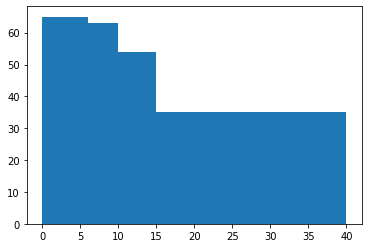

In [55]:
n, bins, patches=plt.hist(dataF2['Suicide mortality rate'],bins=[0,6,10,15,40])

In [56]:
n,sum(n)

(array([65., 63., 54., 35.]), 217.0)

In [58]:
pourcentage=[]
for i in range(len(dataF2)):
    if dataF2['Suicide mortality rate'][i]<6:
        pourcentage.append('< 6%')
    elif dataF2['Suicide mortality rate'][i]>=6 and dataF2['Suicide mortality rate'][i]<10 :
        pourcentage.append('6-10%')
    elif dataF2['Suicide mortality rate'][i]>=10 and dataF2['Suicide mortality rate'][i]<15 :
        pourcentage.append('10-15%')
    elif dataF2['Suicide mortality rate'][i]>=15:
        pourcentage.append('> 15%')

In [59]:
dataF2['Suicide mortality rate']=pourcentage

/Users/catalinagonzalez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
dataF2.head()

,CO2 emissions,Forest area,PM2.5 air pollution,Nitrous oxide emissions,Renewable energy,Suicide mortality rate
0,8463.436,2.067825,100.000000,22.136681,14.839806,< 6%
1,4598.418,28.332116,100.000000,-27.981393,37.115330,6-10%
2,119177.500,0.805294,100.000000,47.007196,0.258072,< 6%
3,29057.308,46.907837,100.000000,-79.857727,54.193837,< 6%
4,187919.082,10.449119,99.447641,35.154320,8.961446,6-10%


## Definition de une nouvelle data frame

In [61]:
mycolumns=['CO2 emissions','Forest area','PM2.5 air pollution'
           ,'Nitrous oxide emissions',
          'Renewable energy','Suicide mortality rate']
dataF3=dataF2[mycolumns]

In [62]:
dataF3.head()

,CO2 emissions,Forest area,PM2.5 air pollution,Nitrous oxide emissions,Renewable energy,Suicide mortality rate
0,8463.436,2.067825,100.000000,22.136681,14.839806,< 6%
1,4598.418,28.332116,100.000000,-27.981393,37.115330,6-10%
2,119177.500,0.805294,100.000000,47.007196,0.258072,< 6%
3,29057.308,46.907837,100.000000,-79.857727,54.193837,< 6%
4,187919.082,10.449119,99.447641,35.154320,8.961446,6-10%


# Visualisation des données

In [63]:
dataF3.describe(include='all')

,CO2 emissions,Forest area,PM2.5 air pollution,Nitrous oxide emissions,Renewable energy,Suicide mortality rate
count,2.170000e+02,217.000000,217.000000,217.000000,217.000000,217
unique,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,< 6%
freq,NaN,NaN,NaN,NaN,NaN,65
mean,1.355759e+06,31.077404,94.123985,18.175613,33.335944,NaN
std,4.112499e+06,21.361405,19.387918,62.335509,28.982086,NaN
min,9.900900e+01,0.000000,0.735150,-79.857727,0.000000,NaN
25%,4.679092e+03,12.708940,99.508177,-24.396363,9.359817,NaN
50%,4.411401e+04,30.869964,100.000000,14.421255,24.544339,NaN
75%,3.530331e+05,44.008726,100.000000,35.154320,54.193837,NaN


### Normlaisation des données

Pour déterminer des groupes de vins qui se ressemblent, on commence par normaliser les données car nos
variables ont des unités très différentes. Cette étape permet de donner le même poids à chaque variable (pour
que les variables ayant des valeurs plus grandes n’aient pas une influence disproportionnée).

In [64]:
cols =list(dataF3.columns)
cols.remove('Suicide mortality rate')

In [65]:
dataF3[cols]=dataF3[cols].apply(zscore,axis=0)

In [66]:
dataF3.describe()

,CO2 emissions,Forest area,PM2.5 air pollution,Nitrous oxide emissions,Renewable energy
count,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02
mean,8.185976e-17,6.031562e-17,-2.228440e-16,-1.227896e-17,2.148819e-17
std,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00
min,-3.304061e-01,-1.458203e+00,-4.827995e+00,-1.576309e+00,-1.152885e+00
25%,-3.292898e-01,-8.618785e-01,2.783507e-01,-6.845281e-01,-8.291868e-01
50%,-3.196786e-01,-9.733425e-03,3.037769e-01,-6.036749e-02,-3.040475e-01
75%,-2.443878e-01,6.067588e-01,3.037769e-01,2.730059e-01,7.213462e-01
max,7.827570e+00,3.159067e+00,3.037769e-01,5.447517e+00,2.195794e+00


In [67]:
dataF3.head()

,CO2 emissions,Forest area,PM2.5 air pollution,Nitrous oxide emissions,Renewable energy,Suicide mortality rate
0,-0.328367,-1.361177,0.303777,0.063691,-0.639668,< 6%
1,-0.329309,-0.128813,0.303777,-0.742173,0.130706,6-10%
2,-0.301384,-1.420417,0.303777,0.463592,-1.143960,< 6%
3,-0.323348,0.742790,0.303777,-1.576309,0.721346,< 6%
4,-0.284630,-0.967913,0.275221,0.273006,-0.842964,6-10%


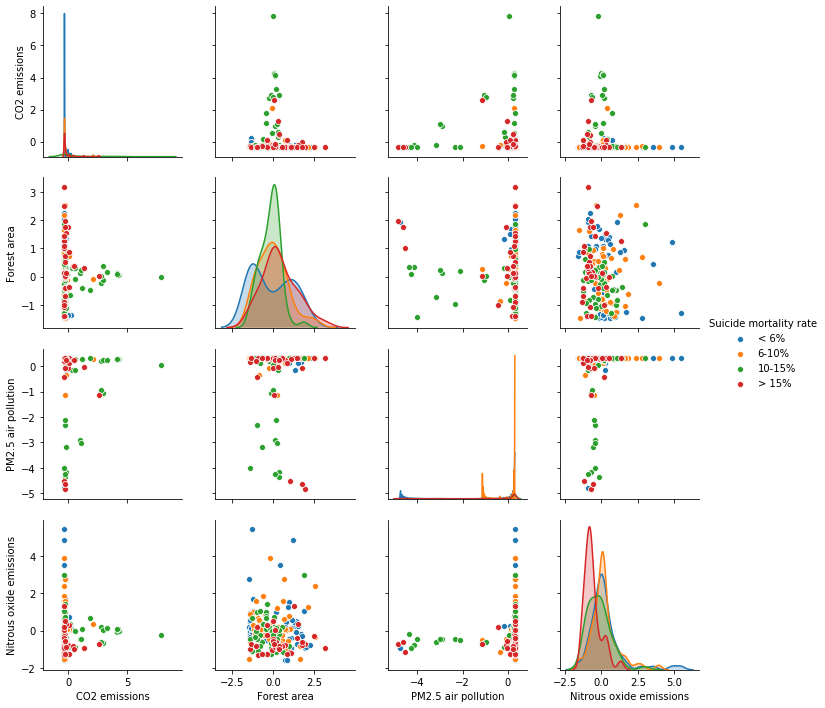

In [69]:
#sns.scatterplot(data=dataF3, hue='Suicide mortality rate')
sns.pairplot(data=dataF3, vars=dataF3.columns[0:4], hue='Suicide mortality rate')

## Identification des outliers (?)

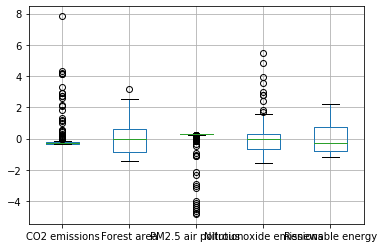

In [70]:
dataF3.boxplot()

# Recherche de clusters
On réalise un clustering hiérarchique en méthode single avec distance euclidienne sur notre jeu
de données. Nous cherchons ici à déterminer des clusters de type contour. Cette représentation nous permet
aussi de prendre une décision quant à nos outliers.

## Kmeans 
Nous cherchons des clusters sphériques grâce à la méthode des k-means.
Afin de déterminer le nombre de groupes que l’on va créer, on fait varier le nombre de groupes dans notre
k-means puis on calcule la SSE totale de notre clustering. Le nombre de groupes que l’on retient est
celui qui donne une SSE suffisamment faible avec un nombre de groupes suffisamment petit.

In [71]:
classes = dataF3['Suicide mortality rate']
objects = dataF3.drop(['Suicide mortality rate'],axis=1)

In [72]:
# Get SSE when varying the number of clusters
sse_list = []
k_list = range(2,11)
for i in k_list:
    km_i_clusters=KMeans(n_clusters=i)
    km_i_clusters.fit(objects)
    sse_list = sse_list + [km_i_clusters.inertia_]
print(sse_list)

[878.5784755839813, 682.1771766949103, 515.9754511663803, 409.34561327955976, 330.70860644304787, 289.2506088639191, 261.5606458738925, 244.8918044885224, 223.30400163374946]


Text(0, 0.5, 'SSE')

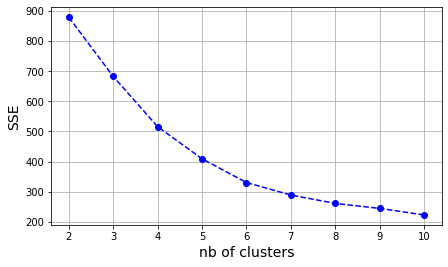

In [73]:
fig = plt.figure(figsize=(7, 4))
plt.plot(k_list,sse_list,'bo--')
plt.grid()
plt.xlabel("nb of clusters",fontsize=14)
plt.ylabel("SSE",fontsize=14)

SSE: la somme des écarts au carré de la différence (distance) entre un point de jeu de données et son centroide (cluster). 
On ne regarde pas la SSE mais le gain en SSE (de 2 à 3 il y a un grand gain).

Le nombre optimal de clusters pour notre jeu de données semble être 5

In [74]:
km=KMeans(n_clusters=5)
km.fit(objects) # compute the clusters --> lancer le kmeans
centroids=km.cluster_centers_

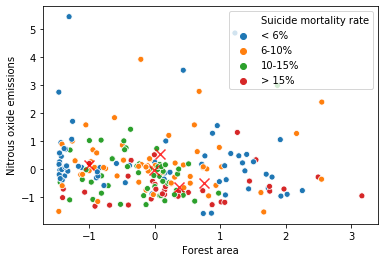

In [75]:
sns.scatterplot(data=dataF3, x="Forest area", y="Nitrous oxide emissions", hue='Suicide mortality rate')
# plot the centroids
sns.regplot(x=centroids[:,dataF3.columns.get_loc("Forest area")], y=centroids[:,dataF3.columns.get_loc("Nitrous oxide emissions")],
            scatter=True, fit_reg=False, marker='x', scatter_kws={"s": 100}, color="r")

### Étude de la stabilité de la convergence de K-means

## Hierarchical clustering (complete/single)

### Deandrograms for hierarchical clustering

## DBSCAN

# CLASSIFICATION

In [76]:
X = dataF3.drop(['Suicide mortality rate'],axis=1)
Y=dataF3['Suicide mortality rate']

In [77]:
#On randomize la BD pour pouvoir avoir un jeu d'entrainement et un jeu test
#Random_state: on fixe la graine du générateur pseudo aléatoire
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=10)

In [78]:
#On vérifier la distribution 
Counter(Y_test)

Counter({'10-15%': 22, '< 6%': 18, '> 15%': 8, '6-10%': 24})

In [79]:
dt= tree.DecisionTreeClassifier() #constructeur de decision tree 

In [80]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [81]:
Y_predict=dt.predict(X_test)

## Confusion matrix

In [82]:
#lignes vrai classes des objets
#colonnes classes des predits 
pd.crosstab(Y_test,Y_predict)

col_0,10-15%,6-10%,< 6%,> 15%
Suicide mortality rate,,,,
10-15%,15,1,3,3
6-10%,2,8,8,6
< 6%,4,2,10,2
> 15%,2,1,2,3


## Metrics

In [83]:
accuracy_score(Y_test,Y_predict)

0.5

In [84]:
precision_score(Y_test,Y_predict,average="weighted"), precision_score(Y_test,Y_predict,average="macro")

(0.5540027605244997, 0.4919772256728778)

In [85]:
recall_score(Y_test,Y_predict,average="weighted"), recall_score(Y_test,Y_predict,average="macro")

(0.5, 0.4864267676767677)

In [86]:
f1_score(Y_test,Y_predict,average="weighted"), f1_score(Y_test,Y_predict,average="macro")

(0.5041061016670771, 0.4679108154717911)

In [87]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

      10-15%       0.65      0.68      0.67        22
       6-10%       0.67      0.33      0.44        24
        < 6%       0.43      0.56      0.49        18
       > 15%       0.21      0.38      0.27         8

    accuracy                           0.50        72
   macro avg       0.49      0.49      0.47        72
weighted avg       0.55      0.50      0.50        72

